# Analyze dynophores

Explore how to analyze dynophores in a Jupyter notebook!

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import dynophores

In [3]:
DATA = Path("../dynophores/tests/data/1KE7-1/out/DynophoreApp/data")

In [4]:
dynophore_files = [file for file in DATA.glob("*")]
len(dynophore_files)
# NBVAL_CHECK_OUTPUT

38

## Create `Dynophore` instance

In [5]:
dynophore = dynophores.Dynophore()

In [6]:
# Check how file name is read in
dynophore._get_file_components(dynophore_files[0])

{'filepath': PosixPath('../dynophores/tests/data/1KE7-1/out/DynophoreApp/data/1KE7-1_data_superfeature_H[4599,4602,4601,4608,4609,4600]_100.0.txt'),
 'dynophore_id': '1KE7-1',
 'superfeature_id': 'H[4599,4602,4601,4608,4609,4600]',
 'superfeature_feature_type': 'H',
 'superfeature_atom_numbers': [4599, 4602, 4601, 4608, 4609, 4600],
 'envpartner_id': None,
 'envpartner_residue_name': None,
 'envpartner_residue_number': None,
 'envpartner_chain': None,
 'envpartner_atom_numbers': None}

## Load dynophore data

In [7]:
dynophore.from_file(DATA)

# Check attributes
print(dynophore.id)
print(dynophore.superfeatures[2].id)
print(dynophore.superfeatures[2].feature_type)
print(dynophore.superfeatures[2].atom_numbers)
print(dynophore.superfeatures[2].occurrences)
print(dynophore.superfeatures[2].envpartners[0].id)
print(dynophore.superfeatures[2].envpartners[0].residue_name)
print(dynophore.superfeatures[2].envpartners[0].residue_number)
print(dynophore.superfeatures[2].envpartners[0].chain)
print(dynophore.superfeatures[2].envpartners[0].atom_numbers)
print(dynophore.superfeatures[2].envpartners[0].occurrences)
print(dynophore.superfeatures[2].envpartners[0].distances)

1KE7-1
HBA[4618]
HBA
[4618]
[0 0 0 ... 0 0 0]
LYS-20-A[316]
LYS
20
A
[316]
[0 0 0 ... 0 0 0]
[11.0768795 11.0768795 10.654148  ...  5.3362694  4.156338   6.2070827]


In [8]:
print(f"Number of superfeatures: {len(dynophore.superfeatures)}")
# NBVAL_CHECK_OUTPUT

Number of superfeatures: 10


In [9]:
n_envpartners = sum([len(superfeature.envpartners) for superfeature in dynophore.superfeatures])
print(f"Number of environmental partners: {n_envpartners}")
# NBVAL_CHECK_OUTPUT

Number of environmental partners: 28


## Explore superfeatures

#### `dynophore.superfeatures_occurrences`

In [10]:
columns = dynophore.superfeatures_occurrences.columns.to_list()
columns.sort()
columns

['AR[4605,4607,4603,4606,4604]',
 'AR[4622,4615,4623,4613,4614,4621]',
 'HBA[4596]',
 'HBA[4606]',
 'HBA[4618]',
 'HBA[4619]',
 'HBD[4598]',
 'HBD[4612]',
 'H[4599,4602,4601,4608,4609,4600]',
 'H[4615,4623,4622,4613,4621,4614]']

In [11]:
dynophore.superfeatures_occurrences[columns].head()
# NBVAL_CHECK_OUTPUT

,"AR[4605,4607,4603,4606,4604]","AR[4622,4615,4623,4613,4614,4621]",HBA[4596],HBA[4606],HBA[4618],HBA[4619],HBD[4598],HBD[4612],"H[4599,4602,4601,4608,4609,4600]","H[4615,4623,4622,4613,4621,4614]"
0,0,0,1,0,0,1,0,0,1,1
1,0,0,1,0,0,1,0,0,1,1
2,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,1,1,1


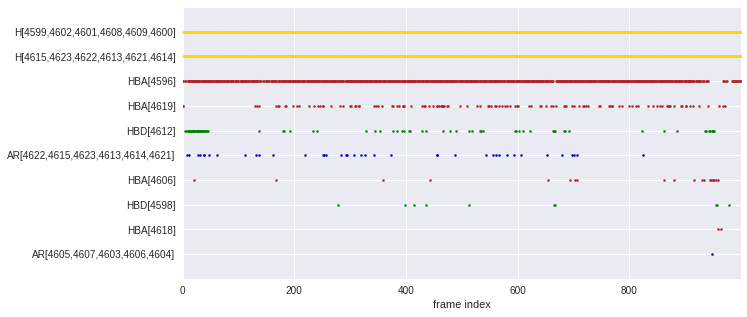

In [12]:
dynophores.plots.plot_superfeatures_occurrences(dynophore)

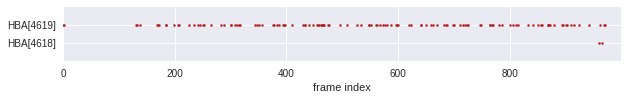

In [13]:
dynophores.plots.plot_superfeatures_occurrences(
    dynophore, superfeature_names=["HBA[4619]", "HBA[4618]"]
)

Superfeature names ['Nonesense'] omitted because unknown.


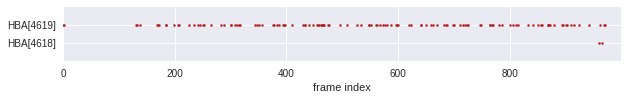

In [14]:
dynophores.plots.plot_superfeatures_occurrences(
    dynophore, superfeature_names=["HBA[4619]", "HBA[4618]", "Nonesense"]
)

## Explore interactions

#### `dynophore.envpartners_occurrences`

In [15]:
print(dynophore.envpartners_occurrences.keys())
dynophore.envpartners_occurrences["HBA[4619]"].head()

dict_keys(['H[4599,4602,4601,4608,4609,4600]', 'HBA[4606]', 'HBA[4618]', 'H[4615,4623,4622,4613,4621,4614]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBD[4612]', 'HBA[4596]', 'AR[4605,4607,4603,4606,4604]', 'HBD[4598]', 'HBA[4619]'])


,ASP-86-A[1313],LYS-20-A[316],LYS-20-A[308],ILE-10-A[165]
0,1,0,0,0
1,1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


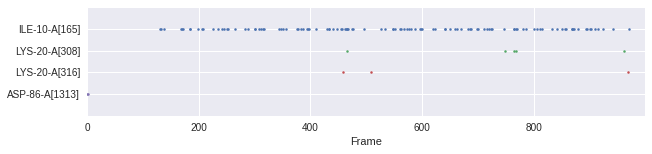

In [16]:
dynophores.plots.plot_envpartners_occurrences(dynophore, "HBA[4619]")

#### `dynophore.envpartners_distances`

In [17]:
print(dynophore.envpartners_distances.keys())
dynophore.envpartners_distances["HBA[4619]"].head()

dict_keys(['H[4599,4602,4601,4608,4609,4600]', 'HBA[4606]', 'HBA[4618]', 'H[4615,4623,4622,4613,4621,4614]', 'AR[4622,4615,4623,4613,4614,4621]', 'HBD[4612]', 'HBA[4596]', 'AR[4605,4607,4603,4606,4604]', 'HBD[4598]', 'HBA[4619]'])


,ASP-86-A[1313],LYS-20-A[316],LYS-20-A[308],ILE-10-A[165]
0,2.995031,10.283849,12.086337,10.234147
1,2.995031,10.283849,12.086337,10.234147
2,5.948585,9.915476,10.457222,8.992463
3,6.975447,8.698255,10.351493,9.028577
4,5.173286,10.217158,10.532646,9.939754


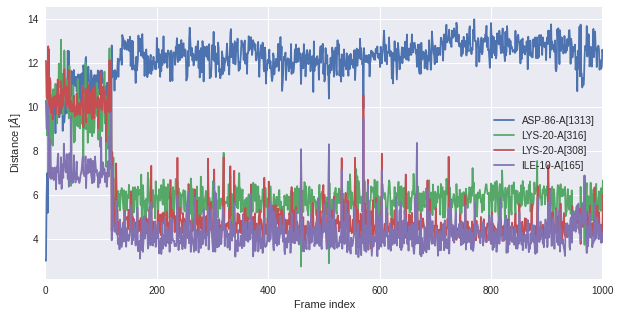

In [18]:
dynophores.plots.plot_envpartner_distances(dynophore, "HBA[4619]", kind="line")

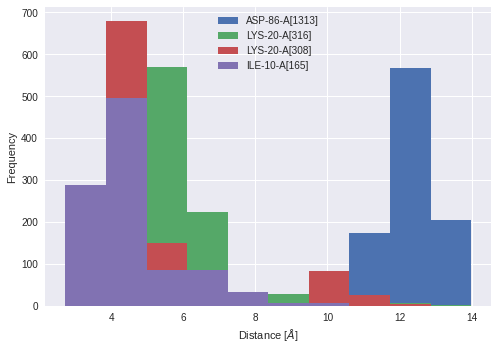

In [19]:
dynophores.plots.plot_envpartner_distances(dynophore, "HBA[4619]", kind="hist")

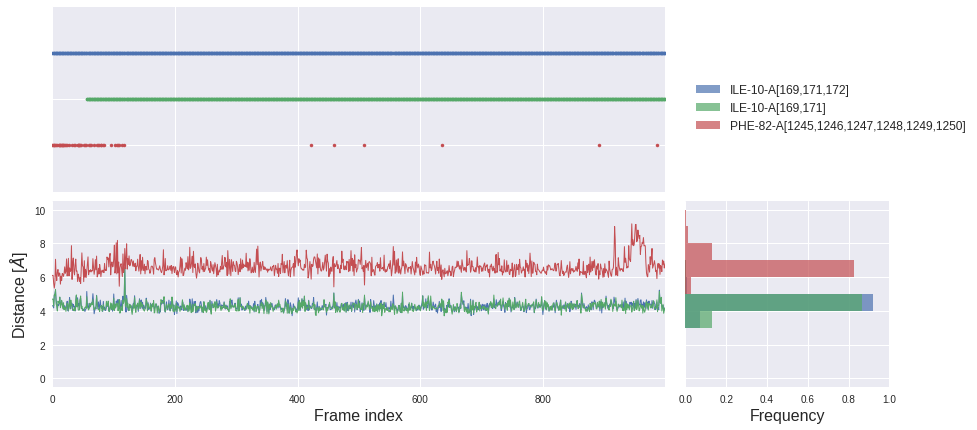

In [20]:
superfeature_name = "H[4615,4623,4622,4613,4621,4614]"
dynophores.plots.plot_envpartners(dynophore, superfeature_name)

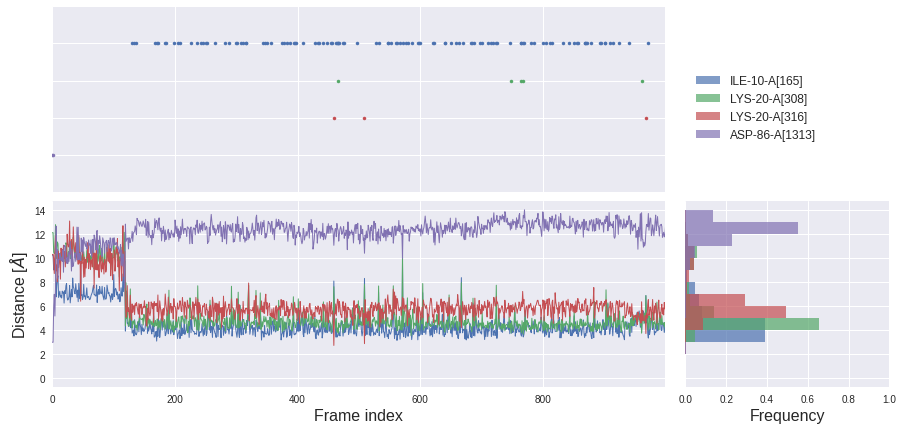

In [21]:
superfeature_name = "HBA[4619]"
dynophores.plots.plot_envpartners(dynophore, superfeature_name)

#### `n_frames`, `count`, and `frequency`

##### Dynophore

In [22]:
dynophore.n_frames

1002

In [23]:
dynophore.count

,"H[4599,4602,4601,4608,4609,4600]",HBA[4606],HBA[4618],"H[4615,4623,4622,4613,4621,4614]","AR[4622,4615,4623,4613,4614,4621]",HBD[4612],HBA[4596],"AR[4605,4607,4603,4606,4604]",HBD[4598],HBA[4619]
"ALA-144-A[2263,2266]",992,0,0,0,0,0,0,0,0,0
"ALA-31-A[488,491]",216,0,0,0,0,0,0,0,0,0
ASP-86-A[1313],0,0,0,0,0,0,0,0,0,2
ASP-86-A[1319],0,0,0,0,0,18,0,0,0,0
ASP-86-A[1320],0,0,0,0,0,20,0,0,0,0
GLN-131-A[2057],0,0,0,0,0,1,0,0,0,0
GLN-131-A[2061],0,0,0,0,0,8,0,0,0,0
GLN-131-A[2062],0,2,0,0,0,0,0,0,0,0
GLU-81-A[1228],0,0,0,0,0,0,0,0,8,0
"HIS-84-A[1284,1285,1286,1287,1288]",0,0,0,0,1,0,0,0,0,0


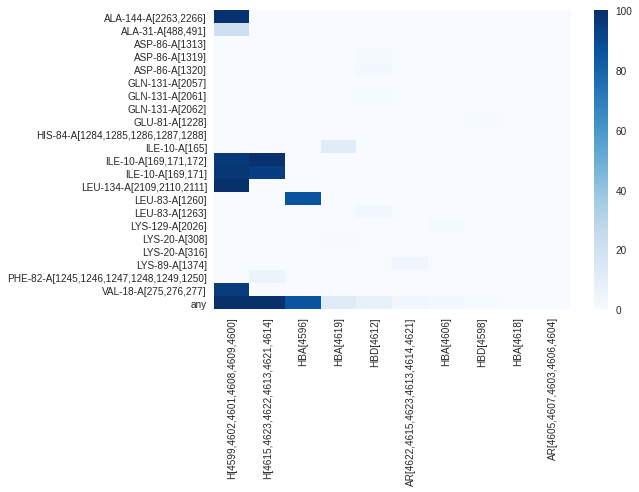

In [24]:
dynophores.plots.plot_superfeatures_vs_envpartners(dynophore)

##### Superfeatures

In [25]:
dynophore.superfeatures[0].n_frames

1002

In [26]:
dynophore.superfeatures[0].count

any                          1002
ILE-10-A[169,171,172]         959
VAL-18-A[275,276,277]         955
ALA-31-A[488,491]             216
LEU-134-A[2109,2110,2111]     999
ALA-144-A[2263,2266]          992
ILE-10-A[169,171]             972
dtype: int64

In [27]:
dynophore.superfeatures[0].frequency

any                          100.00
ILE-10-A[169,171,172]         95.71
VAL-18-A[275,276,277]         95.31
ALA-31-A[488,491]             21.56
LEU-134-A[2109,2110,2111]     99.70
ALA-144-A[2263,2266]          99.00
ILE-10-A[169,171]             97.01
dtype: float64

##### Environmental partners

In [28]:
dynophore.superfeatures[0].envpartners[0].n_frames

1002

In [29]:
dynophore.superfeatures[0].envpartners[0].count

959

In [30]:
dynophore.superfeatures[0].envpartners[0].frequency

95.71